# Dataset 1:FIFA

In [4]:
import numpy as np
import pandas
import math

In [2]:
import scipy
import scipy.integrate as integ

In [5]:
pd = pandas.read_csv("dataset/fifa.csv")

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0dd846e10>]],
      dtype=object)

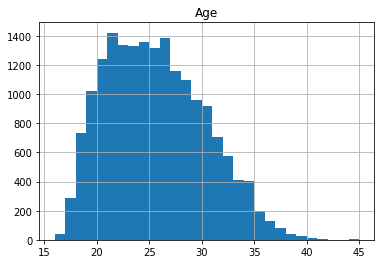

In [7]:
pd.hist(column = "Age", bins = 29)

### BoxPlot

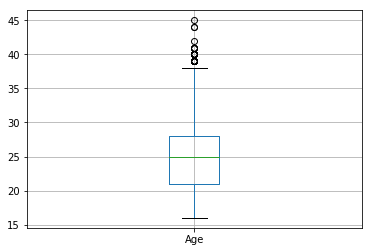

In [5]:
pd.boxplot(column = "Age")

### Deskripsi Statistik

#### a. Minimum Value

In [6]:
pd["Age"].min()

16

#### b. Maximum Value

In [7]:
pd['Age'].max()

45

#### c. Mean

In [8]:
pd["Age"].mean()

25.122205745043114

#### d. Mode

In [9]:
pd["Age"].mode()

0    21
dtype: int64

#### e. Median

In [10]:
pd["Age"].median()

25.0

#### f. Variance

In [11]:
pd["Age"].var()

21.80836494657141

#### g. Standard Deviation

In [12]:
pd["Age"].std()

4.66994271341431

#### h. Skewness

In [13]:
pd["Age"].skew()

0.3917641387687474

#### h. Kurtosis

In [14]:
pd["Age"].kurtosis()

-0.4595135539307731

#### Fungsi Distribusi Peluang yang Paling Sesuai
Menurut kami, dataset FIFA ini seseuai dengan fungsi distribusi hipergeometrik karena setiap datum dapat diklasifikasikan kedalam suatu grup usia tertentu. Bila kita memiliki banyak grup usia, maka dataset dapat dikategorikan kedalam fungsi distribusi peluang hipergeometric multivariate

#### Jawaban
Dengan asumsi dataset mengikuti distribusi peluang hipergeometrik, maka

##### i. Umur kurang dari 22 tahun

In [15]:
def faktorial(i) :
    return math.factorial(i)

In [16]:
def combin(N , x):
    return (faktorial(N)//(faktorial(N-x)*faktorial(x)))

In [17]:
def hipergeo(x, N, n, k) :
    return (combin(k, x)*combin(N-k, n-x))/combin(N, n)

In [18]:
sum = 0
for x in range(1001):
    sum = sum + x*hipergeo(x, pd["Age"].count(), 1000, pd[pd["Age"] < 22]["Age"].count())

Jadi ekspektasi **jumlah** pemain bola yang berumur kurang dari 22 tahun dari sampel sejumlah 1000 dan diambil dari populasi adalah, 

In [19]:
math.floor(sum)

260

##### ii. Umur lebih dari 40 tahun

In [20]:
sum = 0
if (pd[pd["Age"] > 40]["Age"].count() < 1000):
    for x in range(pd[pd["Age"] > 40]["Age"].count() + 1):
        sum = sum + x*hipergeo(x, pd["Age"].count(), 1000, pd[pd["Age"] > 40]["Age"].count())
else :
    for x in range(1001):
        sum = sum + x*hipergeo(x, pd["Age"].count(), 1000, pd[pd["Age"] > 40]["Age"].count())

Jadi ekspektasi **jumlah** pemain bola yang berumur lebih dari 40 tahun dari sampel sejumlah 1000 dan diambil dari populasi adalah, 

In [21]:
math.floor(sum)

0

# Dataset 3:Black Friday

In [22]:
data = pandas.read_csv("dataset/black_friday.csv", header = None)

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e756e5630>]],
      dtype=object)

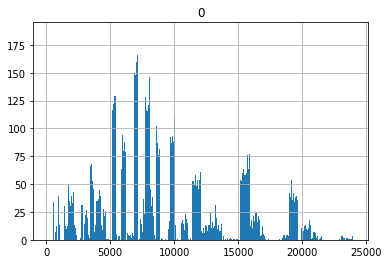

In [23]:
data.hist(bins = 23961 - 185)

### BoxPlot

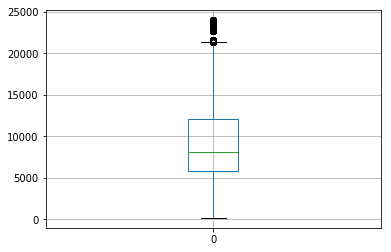

In [24]:
data.boxplot()

### Deskripsi Statistik

#### a. Minimum Value

In [25]:
data.min()

0    185
dtype: int64

#### b. Maximum Value

In [26]:
data.max()

0    23961
dtype: int64

#### c. Mean

In [27]:
data.mean()

0    9333.859853
dtype: float64

#### d. Mode

In [28]:
data.mode()

0
0  6855

#### e. Median

In [29]:
data.median()

0    8062.0
dtype: float64

#### f. Variance

In [30]:
data.var()

0    2.481058e+07
dtype: float64

#### g. Standard Deviation

In [31]:
data.std()

0    4981.022133
dtype: float64

#### h. Skewness

In [32]:
data.skew()

0    0.62428
dtype: float64

#### h. Kurtosis

In [33]:
data.kurtosis()

0   -0.343121
dtype: float64

#### Fungsi Distribusi Peluang yang Paling Sesuai
Menurut kami, dataset Black Friday ini seseuai dengan fungsi distribusi hipergeometrik karena setiap datum dapat diklasifikasikan kedalam suatu grup pengeluaran tertentu. Bila kita memiliki banyak grup pengeluaran, maka dataset dapat dikategorikan kedalam fungsi distribusi peluang hipergeometric multivariate

Namun dapat dilihat pada sesi pertanyaan-jawaban, dataset dapat diaproksimasikan kedalam fungsi distribusi binomial karena n/N <= 0.05

#### Jawaban
Dengan asumsi dataset mengikuti distribusi peluang hipergeometrik yang diaproksimasi kedalam fungsi distribusi binomial, maka

##### a.i Miskin (total pembelian kurang dari 1000 dolar)

In [34]:
def binom(x, n, p) :
    return combin(n, x)*pow(p, x)*pow((1-p), n-x)

In [35]:
sum = 0
for x in range(251) :
    sum = sum + x*binom(x, 250, data[data < 1000].count()/data.count())

Jadi ekspektasi jumlah pembeli tahun 2019 yang pembeliannya kurang dari $1000 adalah,

In [36]:
math.floor(sum)

3

##### a.ii Kaya (total pembelian lebih dari 10000 dolar)

In [37]:
sum = 0
for x in range(251) :
    sum = sum + x*binom(x, 250, data[data > 10000].count()/data.count())

Jadi ekspektasi jumlah pembeli tahun 2019 yang pembeliannya lebih dari $10000 adalah,

In [38]:
math.floor(sum)

86

##### a.iii Crazy Rich (total pembelian lebih dari 20000 dolar)

In [39]:
sum = 0
for x in range(251) :
    sum = sum + x*binom(x, 250, data[data > 20000].count()/data.count())

Jadi ekspektasi jumlah pembeli tahun 2019 yang pembeliannya lebih dari $20000 adalah,

In [40]:
math.floor(sum)

5

##### b.i Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)

In [41]:
sum = 0
for x in range(1001) :
    sum = sum + x*binom(x, 1000, data[data >= 1980][data <= 2000].count()/data.count())

Jadi ekspektasi jumlah pembeli tahun 2019 yang membeli galaxy fold adalah,

In [42]:
math.floor(sum)

1

##### b.ii MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif)

In [43]:
sum = 0
for x in range(1001) :
    sum = sum + x*binom(x, 1000, data[data >= 2707][data <= 2897].count()/data.count())

Jadi ekspektasi jumlah pembeli tahun 2019 yang membeli galaxy fold adalah,

In [44]:
math.floor(sum)

7

# Dataset 4:Crypto

In [45]:
datacrypto = pandas.read_csv("dataset/crypto.csv", header = None)

### Histogram

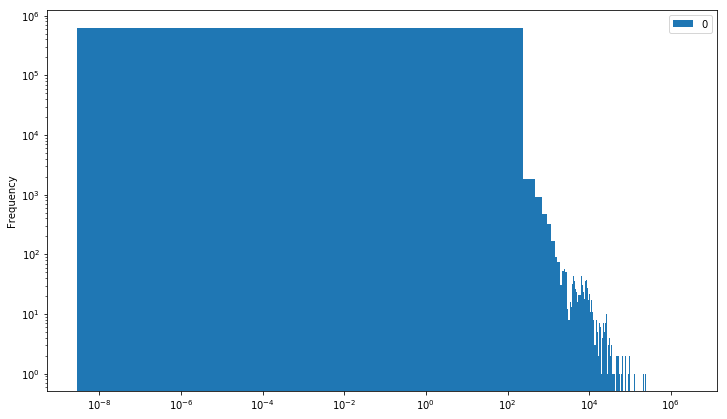

In [46]:
datacrypto.plot(kind = 'hist', figsize = (12, 7), loglog = True, bins = 10000)

/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


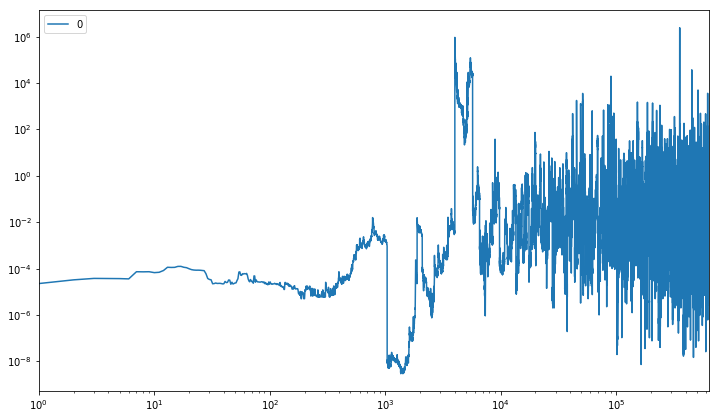

In [47]:
datacrypto.plot(kind = 'line', figsize = (12, 7), loglog = True)

### BoxPlot

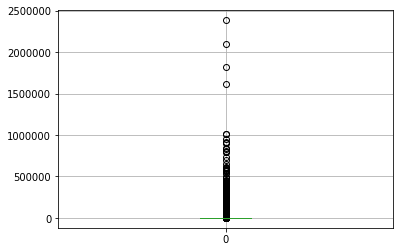

In [48]:
datacrypto.boxplot()

### Deskripsi Statistik

#### a. Minimum Value

In [49]:
datacrypto.min()

0    2.925000e-09
dtype: float64

#### b. Maximum Value

In [50]:
datacrypto.max()

0    2383502.5
dtype: float64

#### c. Mean

In [51]:
datacrypto.mean()

0    203.018146
dtype: float64

#### d. Mode

In [52]:
datacrypto.mode()

0
0  0.000002

#### e. Median

In [53]:
datacrypto.median()

0    0.009734
dtype: float64

#### f. Variance

In [54]:
datacrypto.var()

0    7.532042e+07
dtype: float64

#### g. Standard Deviation

In [55]:
datacrypto.std()

0    8678.733503
dtype: float64

#### h. Skewness

In [56]:
datacrypto.skew()

0    118.239608
dtype: float64

#### h. Kurtosis

In [57]:
datacrypto.kurtosis()

0    22297.470843
dtype: float64

### fungsi gamma

In [58]:
def gammaDist(x, alpha, beta) : 
    return ((1/(pow(beta, alpha)*math.gamma(alpha)))*pow(x, alpha-1)*pow(2.718281828, -1*(x/beta)))

#### Fungsi Distribusi Peluang yang Paling Sesuai
Menurut kami, dataset Kripto ini sesuai dengan fungsi distribusi gamma dengan alpha dan beta sesuai dengan fungsi dibawah ini.

In [59]:
Beta = datacrypto.var()/datacrypto.mean()
Alpha = datacrypto.mean()/Beta

In [60]:
Beta

0    371003.365124
dtype: float64

In [61]:
Alpha

0    0.000547
dtype: float64

#### Jawaban

##### a.i kurang dari 0.177013

Jadi ekspektasi jumlah crypto baru yang harganya kurang dari 0.177013 adalah,

In [62]:
integ.quad(lambda x: gammaDist(x, Alpha, Beta), 0, 0.177013)[0] * 1000

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """Entry point for launching an IPython kernel.


992.379826563502

##### a.ii lebih dari 177.013

Jadi ekspektasi jumlah crypto baru yang harganya lebih dari 177.013 adalah,

In [63]:
(1 - integ.quad(lambda x: gammaDist(x, Alpha, Beta), 0, 177.013)[0]) * 1000

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """Entry point for launching an IPython kernel.


3.862119733626823

##### b.i lebih dari 0.013

jadi jika suatu hari terdapat sebuah cryptocurrency baru, peluang
cryptocurrency tersebut bernilai lebih dari 0.013 adalah

In [64]:
(1 - integ.quad(lambda x: gammaDist(x, Alpha, Beta), 0, 0.013)[0])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """Entry point for launching an IPython kernel.


0.009037196722398666

##### b.ii kurang dari 17.7

jadi jika suatu hari terdapat sebuah cryptocurrency baru, peluang
cryptocurrency tersebut bernilai kurang dari 17.7 adalah

In [65]:
integ.quad(lambda x: gammaDist(x, Alpha, Beta), 0, 17.7)[0]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """Entry point for launching an IPython kernel.


0.994883724254411

# Dataset 5:Atlet

In [66]:
dataatlet = pandas.read_csv("dataset/athletes.csv")

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e609169e8>]],
      dtype=object)

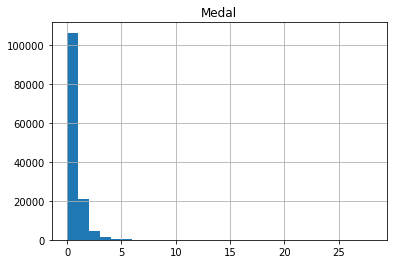

In [67]:
dataatlet.hist(column = 'Medal', bins = 28)

### BoxPlot

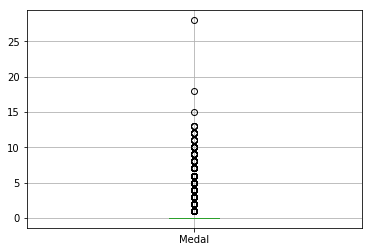

In [68]:
dataatlet.boxplot(column = 'Medal')

### Deskripsi Statistik

#### a. Minimum Value

In [69]:
dataatlet["Medal"].min()

0

#### b. Maximum Value

In [70]:
dataatlet["Medal"].max()

28

#### c. Mean

In [71]:
dataatlet["Medal"].mean()

0.2952772561622789

#### d. Mode

In [72]:
int (dataatlet["Medal"].mode())

0

#### e. Median

In [73]:
dataatlet["Medal"].median()

0.0

#### f. Variance

In [74]:
dataatlet["Medal"].var()

0.5252132778007574

#### g. Standard Deviation

In [75]:
dataatlet["Medal"].std()

0.7247159980300956

#### h. Skewness

In [76]:
dataatlet["Medal"].skew()

4.8199987845312

#### h. Kurtosis

In [77]:
dataatlet["Medal"].kurtosis()

51.562525836059855

#### Fungsi Distribusi Peluang yang Paling Sesuai
Menurut kami, dataset Atlet ini sesuai dengan fungsi distribusi multinomial karena setiap datum dapat diklasifikasikan kedalam suatu grup mendali tertentu.

#### Jawaban

##### a.i tepat 0 medali

In [79]:
k = dataatlet[dataatlet['Medal'] == 0]['Medal'].count() 
N = dataatlet['Medal'].count()
p = k/N
print(p)

0.7906792052311643


##### a.ii lebih dari 10 medali

In [80]:
k = dataatlet[dataatlet['Medal'] > 10]['Medal'].count() 
N = dataatlet['Medal'].count()
p = k/N
print(p)

0.00015586613325812174


##### a.iii tepat 3 medali

In [81]:
k = dataatlet[dataatlet['Medal'] == 3]['Medal'].count()
N = dataatlet['Medal'].count()
p = k/N
print(p)

0.01027974259821422


##### a.iv 1 atau 5 medali

In [82]:
k = dataatlet[dataatlet['Medal'] == 1]['Medal'].count() + dataatlet[dataatlet['Medal'] == 5]['Medal'].count() 
N = dataatlet['Medal'].count()
p = k/N
print(p)

0.1588424341836697


##### b Confidence Interval 95%
Mengunakan Teorema Central Limit

In [83]:
mean = dataatlet["Medal"].mean()
std = dataatlet["Medal"].std()
n = math.sqrt(dataatlet["Medal"].count())
Zetalpha = 2.81
print((mean - (Zetalpha*std/n)), "< u <", (mean + (Zetalpha*std/n)))

0.28972920571042066 < u < 0.30082530661413714
